<a href="https://colab.research.google.com/github/rigole/TensorFlow-Learning/blob/main/TensorLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Constants


In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

In [3]:
# Defining a tensorflow constant
tensor = tf.constant([[23, 4], [32, 51]])

In [4]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[23,  4],
       [32, 51]], dtype=int32)>

# Variables


In [5]:
# Defining a variable in TensorFlow
variable = tf.Variable([[30, 20],[10, 45]])

In [6]:
variable

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[30, 20],
       [10, 45]], dtype=int32)>

# Building Artificial Neural Network

### Importing the librairies and the data set

In [7]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

### Loading the data set

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Normalizing the images

In [9]:
X_train = X_train / 255.0

In [10]:
X_test = X_test / 255.0

### Reshaping the dataset
##### since each image's dimension is 28x28, we reshape the full dataset to [-1, height * width]

In [11]:
X_train = X_train.reshape(-1, 28*28)

In [12]:
X_train.shape

(60000, 784)

In [13]:
# same for the the test shape
X_test = X_test.reshape(-1, 28*28)

### Defining the model

In [14]:
#simply define an object of the Sequential model
model = tf.keras.models.Sequential()

### Adding a first fully connected hidden layer

In [15]:
#layers parameters
  #numbers of units/neurons(128), action_function(ReLU), input_shape(784,)

model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

### Adding a Second Layer 

In [16]:
model.add(tf.keras.layers.Dropout(0.2))

### Adding the output layer

In [17]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### Compiling the model

In [18]:
 model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [20]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5288 - sparse_categorical_accuracy: 0.8112
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3995 - sparse_categorical_accuracy: 0.8555
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3655 - sparse_categorical_accuracy: 0.8674
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3445 - sparse_categorical_accuracy: 0.8728
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3315 - sparse_categorical_accuracy: 0.8779


## Model evaluation and prediction

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3529 - sparse_categorical_accuracy: 0.8741


# Convolutional Neural Networks

### Importing the librairies

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
%matplotlib inline

### Data Preprocessing

#### loading the cirfar10 dataset

In [23]:
# Setting class names in the dataset
class_names = ['airplane', 'automobile', 'bird','cat', 'dog','frog','horse','ship','truck']

In [24]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


#### image normalization

In [25]:
X_train = X_train / 255

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
X_test = X_test / 255

In [28]:
X_test.shape

(10000, 32, 32, 3)

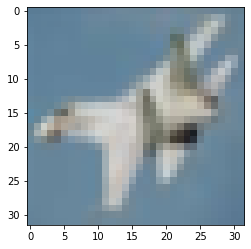

In [29]:
plt.imshow(X_test[10])

### Building the Convolutional Neural Network

#### Defining the model

In [30]:
model = tf.keras.models.Sequential()

#### Adding the first convolutional layer

In [31]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

#### Adding the second convolutional layer and the mex-pooling layer

In [32]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [33]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"))

### Recurrent Neural Networks

#### Importing the librairies

In [34]:
from tensorflow.keras.datasets import imdb

#### Data Preprocessing

In [35]:
number_of_word = 2000
max_len = 100

####Loading the IMBD dataset

In [36]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_word)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

#### Padding all sequnces to be the same length

In [37]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)

In [38]:
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

#### Building the  Recurrent Neural Network

##### Defining the model

In [39]:
model = tf.keras.Sequential()

##### Adding the embedding layer

In [40]:
model.add(tf.keras.layers.Embedding(input_dim=number_of_word, output_dim=128, input_shape=(X_train.shape[1],)))

##### Adding the LSTM layer

In [41]:
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

##### Adding the output layer

In [42]:
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

##### Compiling the model

In [43]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          256000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 387,713
Trainable params: 387,713
Non-trainable params: 0
_________________________________________________________________


##### Training the model

In [45]:
model.fit(X_train, y_train, epochs=3, batch_size=120)

Epoch 1/3
209/209 [==============================] - 76s 353ms/step - loss: 0.5074 - accuracy: 0.7611
Epoch 2/3
209/209 [==============================] - 74s 354ms/step - loss: 0.3700 - accuracy: 0.8399
Epoch 3/3
209/209 [==============================] - 74s 352ms/step - loss: 0.3373 - accuracy: 0.8559


##### Evaluating the model

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

782/782 [==============================] - 27s 34ms/step - loss: 0.3448 - accuracy: 0.8497


In [47]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8496800065040588


### Transfer Learning

In [48]:
!pip install tqdm

#### Downloading the Dogs vs Cats datasets

In [49]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O ./cats_and_dogs_filtered.zip

--2021-07-09 08:06:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 108.177.11.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M   165MB/s    in 0.4s    

2021-07-09 08:06:34 (165 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



#### Data Preprocessing

##### Import project dependencies

In [50]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
tf.__version__

'2.5.0'

##### Unzipping the Dogs vs Cats dataset

In [51]:
dataset_path = "./cats_and_dogs_filtered.zip"

In [52]:
zip_object = zipfile.ZipFile(file=dataset_path, mode="r")

In [53]:
zip_object.extractall(".")

In [54]:
zip_object.close()

##### Setting up dataset paths

In [55]:
dataset_path_new = "./cats_and_dogs_filtered/"

In [56]:
train_dir = os.path.join(dataset_path_new, "train")
validation_dir = os.path.join(dataset_path_new, "validation")

#### Building the model

##### Loading the pre-trained model (MobileNetV2)

In [57]:
IMG_SHAPE = (128, 128, 3)

In [58]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

9412608/9406464 [==============================] - 0s 0us/step


##### Freezing the base model

In [59]:
base_model.trainable = False

##### Custom head for our network

In [60]:
base_model.output

<KerasTensor: shape=(None, 4, 4, 1280) dtype=float32 (created by layer 'out_relu')>

In [61]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [62]:
global_average_layer

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [63]:
prediction_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(global_average_layer)